# Examen 2 - Fisica Computacional
#### Estudiante: Ignacio Vargas Cordero

### Ejercicio 1

Considere una partícula constreñida a moverse en un círculo de radio R. De esta manera la energía del sistema es $E = \frac{p^2}{2mR^2}$ que corresponde a un movimiento con velocidad angular constante $\dot{\theta} = \omega = p/mR^2$. 

Ahora pensemos en que el sistema es perturbado por una fuerza impulsiva cada tiempo $t$ con la misma intensidad en la misma dirección y sentido. Esto quiere decir que dependiendo de la posición de la partícula sobre el círculo, la fuerza actuará sobre la componente tangencial. El efecto de esta perturbación es que hace un cambio instantáneo en el valor del momento angular.

En el momento en el que la fuerza anterior actúa sobre la masa, ésta se encuentra en la posición $\theta(t)$ y en ese instante el cambio en la cantidad de movimiento es $\Delta p = \epsilon \cos \theta$. Esto quiere decir que $p$ permanecerá constante hasta que transcurra un periodo $\tau$ y en ese momento sufrirá un cambio instantáneo $\Delta p$, posteriormente permanecerá constante hasta que se cumpla un periodo más. Por otro lado, $\theta$ tiene la forma $\theta  = \theta_0 + \omega t$, módulo $2 \pi$.

Para analizar el comportamiento del sistema se utiliza una técnica parecida al mapeo de Poicaré. Como la perturbación es periódica podemos tomar un punto en el espacio fase y mapearlo a aquel en el que estará un instante $\tau$ después. Supongamos que las coordenadas iniciales antes de la perturbación son: $\theta_0$, $p_0$ y escoja algún valor de $\tau$.

a) Muestra que en el mapeo los valores subsecuentes son 
$$
\theta_{i+1} = \theta_{i}+ \frac{p_{i+1} \tau}{mR^2}
$$
$$
p_{i+1} = p_i + \epsilon cos \theta_i
$$

donde se ha tomado en cuenta que en el momento en el que la fuerza actua, $\theta$ tenía un valor $\theta_i$

Sea un mapeo cada $\tau$, tal que $\Delta t = \tau $. Sea $p=p_{0}$ momento inicial. La perturbación es $\Delta p=\epsilon cos\theta$. 

Por lo tanto, el momento con la primer perturbacion es: $p_{1}=p_{0}+\Delta p_{0}=p_{0}+\epsilon cos\theta_{0}$. En general, tenemos $p_{i+1}=p_{i}+\Delta p_{i}=p_{i}+\epsilon cos\theta_{i}$

Sabemos que $\theta=\theta_{0}+\omega t$. Como tenemos movimiento solo en el circulo, $\omega$ es constante de movimiento con: $\omega=\frac{p}{mR^2}$. 

$$
\omega=\omega_{0}+\Delta \omega_{0} = \frac{p_{0}}{mR^2} + \frac{\Delta p_{0}}{mR^2} = \frac{p_{0}+\Delta p_{0}}{mR^2} = \frac{p_{1}}{mR^2}
$$

Para la primer perturbacion tenemos: $\theta_{1}=\theta_{0}+\frac{p_{1}}{mR^2} \tau $. En general, tendremos: $\theta_{i+1}=\theta_{i}+\omega \tau \implies \theta_{i+1}=\theta_{i}+\frac{p_{i+1}}{mR^2} \tau$

Como $\theta \in [0,2 \pi]$, tenemos módulo de $2 \pi$,

$$
\theta_{i+1}=\theta_{i}+\frac{p_{i+1}}{mR^2} \tau \hspace{1cm} mod(2 \pi)
$$

$$
p_{i+1}=p_{i}+\epsilon cos\theta_{i}
$$

De aquí en adelante considere $m = 1$ y $R = 1$.

b) Con $\epsilon = 0$, utilice 200 condiciones iniciales arbitrarias tales que $p_0 \in [− \pi /2, \pi/2]$ y $\theta_0 \in [0, 2 \pi]$ y encuentre las curvas en el plano $(\theta, p)$ que resultan de hacer muchas iteraciones del mapeo. Explique el resultado del mapeo. Nota: Haga la gráfica con puntos y tome por lo menos 2,000 iteraciones para cada condición inicial.

In [1]:
from pylab import *
from numpy import *
from scipy.integrate import *
%matplotlib inline

In [2]:
def subsecuentes(inicio, epsilon, N=2000, tau=1.):
    #Declaramos una variable condicion
    condicion = zeros((N,2))
    condicion[0] = inicio
    #En la columna 0, contiene a las theta
    #En la columna 1, contiene a las p
    for i in xrange(1, N):
        condicion[i,1] = condicion[i-1,1] + epsilon*cos(condicion[i-1,0])
        condicion[i,0] = (condicion[i-1,0] + condicion[i,1]*tau)%(2*pi)
    return condicion[:,0], condicion[:,1]

def mapping(epsilon, ax, n=200, N=2000, tau=1.):
    for i in xrange(n):
        #Condiciones iniciales aleatorias con random.rand
        inicio = array([2.0*pi*random.rand(), pi*(random.rand()-0.5)])
        x, y = subsecuentes(inicio, epsilon, N, tau)
        #Graficamos de una vez en la funcion
        ax.plot(x, y, '.', markersize=0.1)
        ax.set_title("$\epsilon = {}$".format(epsilon), fontsize=20)
        ax.set_xlabel("$\\theta$", fontsize=20)
        ax.set_ylabel("$p$", fontsize=20)
        ax.set_xlim(0,2*pi)
        ax.set_ylim(-2,2)

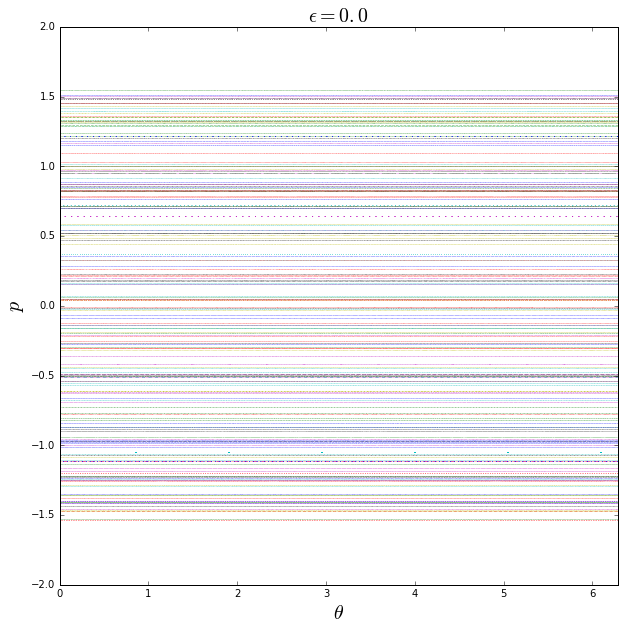

In [3]:
#Graficamos el mapeo 
fig = figure(figsize=(10,10))
ax = fig.add_subplot(111)
mapping(0., ax, n=200, N=2000)

Nuestras condiciones iniciales aleatorias nos generan rectas en el espacio fase. Esto es de esperar, $\epsilon =0$, es decir, no hay perturbaciones. Por lo tanto, tenemos momentos constantes.

c) El sistema tiene puntos fijos para $\epsilon \neq 0$?. De ser afirmativa la respuesta, encuéntrelos y explique el significado de dichos puntos. Los puntos fijos son aquellos que cumplen que $\theta_i+1 = \theta_i$ y $p_{i+1} = p_i$.

Analizando las relaciones de recurrencia para $\theta$ y $p$, y la definicion de punto fijo,

$$ \theta_{i+1} = \theta_{i} + \frac{p_{i+1}}{mR^{2}}\,\tau \quad \textrm{, y} $$
$$ p_{i+1} = p_{i} + \epsilon\,cos(\theta_{i}) ,$$
$$ \theta_{i+1} = \theta_{i} \quad  p_{i+1} = p_{i} $$

Sustituyendo las relaciones de recurrencia en la definición obtenemos:

$$ \theta_{i} = \theta_{i} + \frac{p_{i}}{mR^{2}}\,\tau \quad $$
$$ p_{i} = p_{i} + \epsilon\,cos(\theta_{i}) \quad $$

De esta primer ecuacion tenemos que si $\theta_{f},p_{f}$ son la coordenadas del punto fijo, $ p_{f} = 0 $, y de la segunda ecuacion tenemos que se restringe a que $\theta$ sea un cero de la función coseno:

$$ \theta_{f} = \frac{2n+1}{2}\pi \quad n\in \mathbb{Z}$$

Por lo tanto, sí hay puntos fijos.

Con $\epsilon=0$, $\theta_i = \pm \frac{\pi}{2}$, tenemos $p_{i+1} = p_i$ y $\frac{p_{i+1} \tau}{mR^2}=0 \ (\text{mod }2\pi)$

Por lo tanto los puntos fijos ocurren cuando $\theta_i = \pm \frac{\pi}{2}$ y $p_{i} = 2\pi n \frac{mR^2}{\tau}$


d) Realice simulaciones con $\epsilon \in \{0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.7, 1.1 \}$. Explique detalladamente sus resultados.

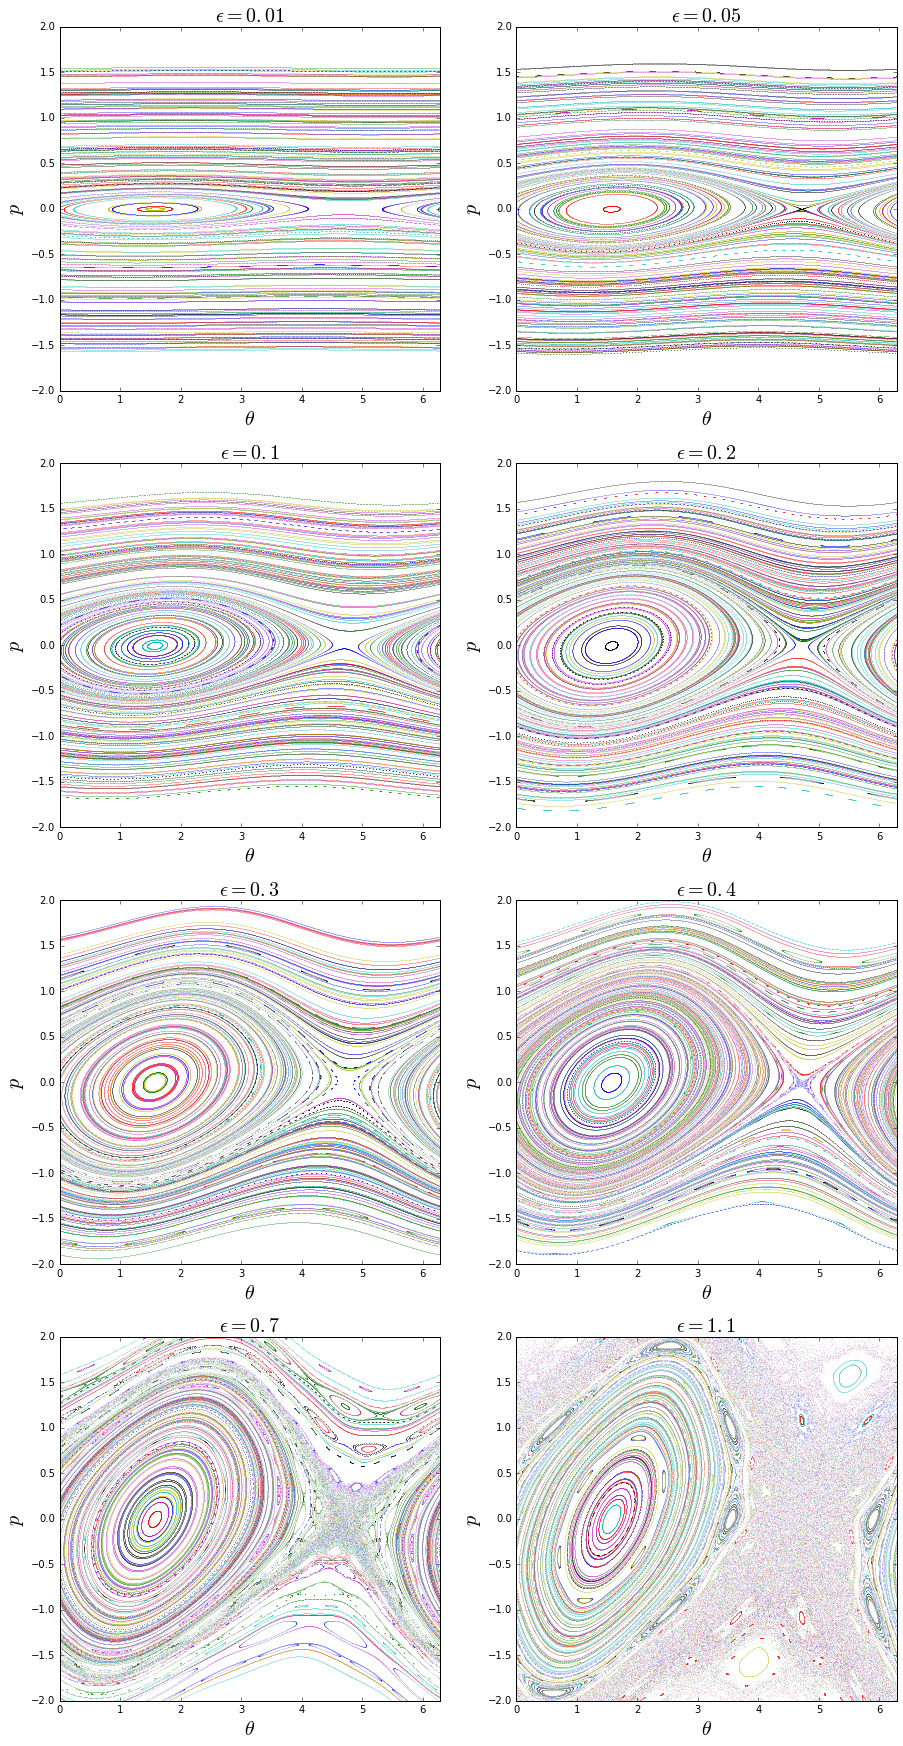

In [4]:
#Graficamos todas las simulaciones con las diferentes perturbaciones.
fig, ax = subplots(4, 2, figsize=(15,30))
eps = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.7, 1.1]
for i in range(4):
    for j in range(2):
        mapping(eps[i*2+j], ax[i,j], n=200, N=2000)

Tenemos un espacio fase similar al caso sin perturbacion para las perturbaciones menores, pero al aumentarla van apareciendo estructuras fijas en el sistema. Despues de cierta perturbacion, muchas zonas parecen descender en caos.

### Ejercicio 2



Considere un sistema en el que la Hamiltoniana es:
$$ H = \frac{1}{2} (p^2_x + p^2_y) + \frac{1}{2} (x^2 + y^2) + x^2 y − \frac{1}{3}y^3$$

En este caso se puede ver que la energía, $E = H$, es una contante de movimiento.

a) Muestre que el sistema tiene órbitas acotadas. ¿Para que valor de la energía se dan dichas órbitas?. 

Tenemos $ H = \frac12 (p_x^2+p_y^2)+\frac12(x^2+y^2) + x^2y-\frac13y^3$. Aproximando $x$ y $y$ suficientemente pequenas, podemos aproximar el Hamiltoniano a segundo orden. 
$$ H \approx \frac12 (p_x^2+p_y^2)+\frac12(x^2+y^2)$$
Esto corresponde al oscilador armónico en 2D.

Por lo tanto, para estos valores pequenos, tendremos órbitas cerradas.

De aquí en adelante, concentrémonos en condiciones iniciales con $E < 1/6$.

b) Realice un programa en el que se escojan condiciones iniciales con $x = 0$ y con valores de $(y, py)$ compatibles con la condición de energía de la oración anterior. Escoja un valor para la energía y ello determinará el valor de $px$ para esa condición inicial. Ahora obtenga la trayectoria para la condición inicial que se escoja y resuelva las ecuaciones de movimiento dadas por:
$$ \dot{x} = \frac {\partial H}{ \partial p_x} \ \ \ \ \ \ \ \ \ \dot{y} = \frac{\partial H}{\partial p_y} \ \ \ \ \ \ \ \ \ \dot{p_x} = −\frac{\partial H}{\partial x} \ \ \ \ \ \ \ \ \ \dot p_y = −\frac{\partial H}{\partial y}$$


In [5]:
def emov(x,t):
    return array([x[2], x[3], -x[0]-2*x[0]*x[1], -x[1]-x[0]**2+x[1]**2])

def energia(x):
    return 0.5*(x[0]**2+x[1]**2+x[2]**2+x[3]**2)+x[1]*x[0]**2-(x[1]**3)/3.

In [6]:
def trayectoria_raiz(funcion, ptoi, ti, error=1e-5):
    while abs(ptoi[0]) > error:
        tip1 = ti - (ptoi[0]/ptoi[2])
        paso = odeint(funcion, ptoi, [ti, tip1], atol = 1e-9, rtol= 1e-9)
        ptoi = paso[-1]
    return ptoi

def trayectoria(funcion, E, t):
    y, py = 0.1*random.rand(), random.uniform(-0.15,0.15)
    px2 = 2*(E+(1./3.)*y**3-0.5*y**2)-py**2    
    while px2 < 0.0:
        y, py = 0.1*random.rand(), random.uniform(-0.15,0.15)
        px2 = 2.0*(E+(1./3.)*y**3-0.5*y**2)-py**2
    px = sqrt(px2)
    p_ini = array([0.0, y, px, py])
    sol = odeint(funcion, p_ini, t, mxstep=2000, atol=1e-9, rtol=1e-9)
    return sol

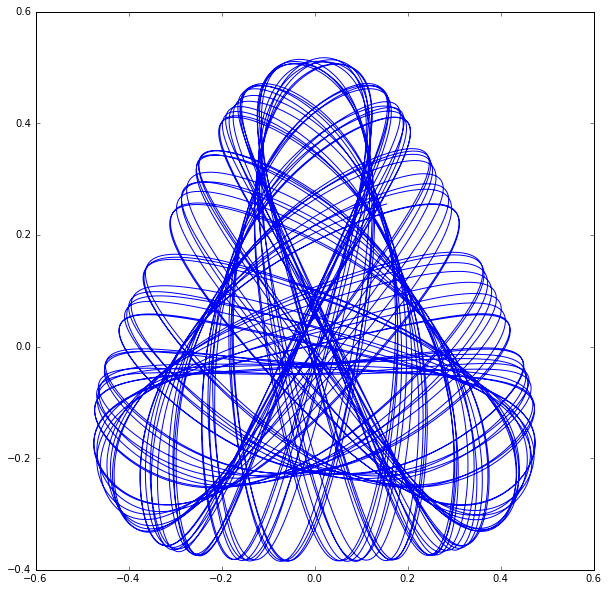

In [7]:
t = linspace(0,500,10000)
E = 0.1
sol = trayectoria(emov, E, t)
figure(figsize=(10,10))
plot(sol[:,0], sol[:,1])

c) Ahora programe una función que obtenga todos los puntos de la trayectoria solución cuando $x = 0$. Escoja 15 trayectorias tales que $x = 0$, $y \in [0, 0.1]$ y $p_x \in [−0.15, 0.15]$. El valor de $p_y$ tendrá que ser compatible con el valor de energía en el siguiente inciso.


In [8]:
def mapeo_poincare(funcion, E, t): 
    y, px = 0.1*random.rand(), random.uniform(-0.15,0.15)
    py2 = 2*(E+(1./3.)*y**3-0.5*y**2)-px**2    
    while py2 < 0.0:
        y, px = 0.1*random.rand(), random.uniform(-0.15,0.15)
        py2 = 2.0*(E+(1./3.)*y**3-0.5*y**2)-px**2
    py = sqrt(py2)
    p_ini = array([0.0, y, px, py])
    sol = odeint(funcion, p_ini, t, mxstep=2000, atol=1e-9, rtol=1e-9)
    num = len(t)
    raices, puntos = zeros(num), zeros((num,4))
    j = 0
    for i in range(num-1):
        if sol[i][0]*sol[i+1][0] < 0.0:
            puntos[j] = trayectoria_raiz(funcion, sol[i], t[i], error=1e-5)
            j += 1
    puntos = puntos[0:j]
    return puntos

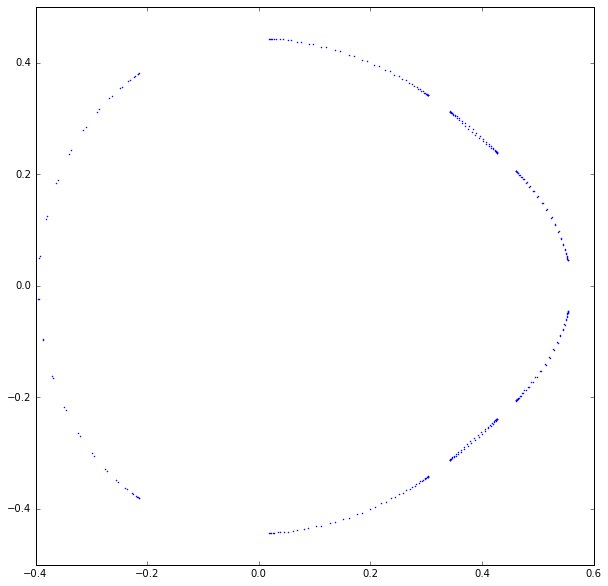

In [9]:
t = linspace(0,1000,10000)
E = 0.1
puntos = mapeo_poincare(emov, E, t)

figure(figsize=(10,10))
plot(puntos[:,1], puntos[:,3],'.',markersize=2)

d) Realice simulaciones con las condiciones iniciales anteriores para los siguientes valores de energía $E = 0.01, 0.03, 0.1, 0.12, 0.15, 0.166$. Haga la gráfica del espacio fase $(y, p_y)$ para cada condición inicial. De esta manera podemos obtener el comportamiento del sistema cuando barremos valores de energía que se van acercando a $1/6$. Explique los resultados obtenidos.

0.01
0.03
0.1
0.12
0.15
0.166


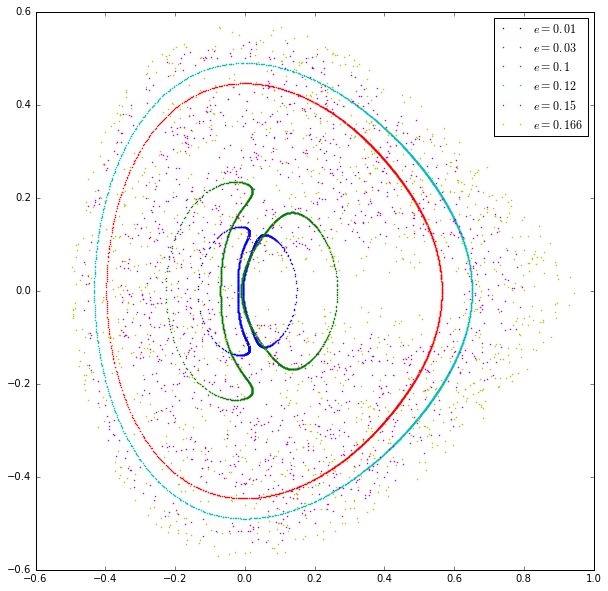

In [12]:
t = linspace(0, 5000, 15000)
E = array([0.01, 0.03, 0.1, 0.12, 0.15, 0.166])

figure(figsize=(10,10))
for e in E:
    print e
    puntos = mapeo_poincare(emov, e, t)
    plot(puntos[:,1], puntos[:,3],'.', markersize=2, label="$e={}$".format(e))
legend()